In this notebook we will be working on retail data provided by chips manager julia <br>
<br>

### Workflow
    Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

    Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

    Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

    Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.
    
#### Load the essenetials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##examining transaction data
transaction_data = pd.read_excel('../Data/QVI_transaction_data.xlsx')
transaction_data.shape

(264836, 8)

now we will going through some of data data wrangling steps 
1. missing values
    <br>correcting the data formats 
    <br>

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# from above obsearvation we can determine to not to have a single missing value in our transaction data
# date column dtype is int ......we need to fix it

transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin = '1899-12-30', unit='D')

In [7]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
## examine the behaviour data
consumer_data = pd.read_csv('../Data/QVI_purchase_behaviour.csv')
consumer_data.shape

(72637, 3)

In [9]:
consumer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
consumer_data.head(6)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget


## merge 
we will merging both the datasets given and will more forward in our analysis


In [12]:
data = pd.merge(transaction_data,consumer_data,on='LYLTY_CARD_NBR')
data.shape

(264836, 10)

since we have seen that both of our component datasets (transaction and consumer ) has no missing values and we already countered the data format errors , so we believe their combination to be free from these erors
<br>


In [13]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


## Now let's move to data analysis part

In [15]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [16]:
## get the summary stastics
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Let's dive into total sales column and will try to ans following questions

* What is the annual trend of sales per day ?
* What is the annual trend of sales per month (**month with least and most sales**) ?
* Monthly sales encountered ?

In [17]:
# Create a new dataframe which contains the total sale for each date

dailysales = pd.pivot_table(data, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
dailysales.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [18]:

b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
b.head()

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0


In [19]:
dailyplot = dailysales+b
dailyplot.fillna(0,inplace=True)

In [20]:
dailyplot.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


<Figure size 864x576 with 0 Axes>

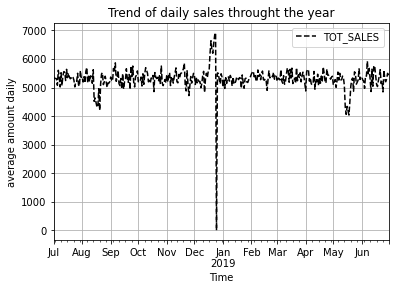

In [21]:
## let's look at the trend daily average total sales revenue throuhout the year(we have data from june 2018 to july 2019)
daily_sales=dailyplot

plt.figure(figsize=(12,8))
daily_sales.plot(style='k--')
plt.title("Trend of daily sales throught the year")
plt.xlabel("Time")
plt.ylabel("average amount daily")
plt.grid(True)


aug 2018 and may 2019 are least successfull months for the chips sales


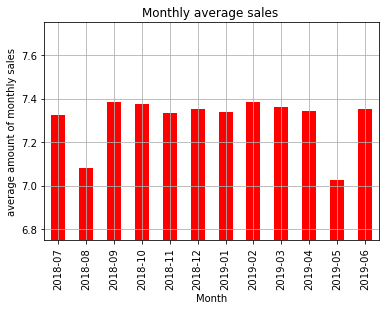

In [22]:
#above trend forces us to look at the monthly average sales 
data['Month'] = pd.to_datetime(data['DATE']).dt.to_period('M')
monthly_sales = data.groupby('Month')['TOT_SALES'].mean()
monthly_sales.plot.bar(color='r')
plt.ylim(6.75,7.75)
plt.title("Monthly average sales ")
plt.ylabel("average amount of monthly sales")
plt.grid(True)
print("aug 2018 and may 2019 are least successfull months for the chips sales")

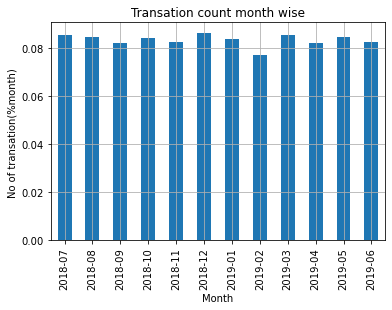

In [23]:
# most busy months (months with maximum no of transaction records)
busy_months = data.groupby("Month").count()['TOT_SALES']/len(data)
busy_months.plot.bar()
plt.title("Transation count month wise")
plt.ylabel("No of transation(%month) ")
plt.grid(True)

let's dive into `PROD_QTY` column<br><br>
* What are different `PROD_QTY` available??
* Most common and least common values?

In [24]:
## Let's examine prod_qty column
print(data['PROD_QTY'].unique())
data['PROD_QTY'].value_counts()

[  2   3   1   5   4 200]


2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

Text(0.5, 1.0, 'PROD_QTY vs avrage sales')

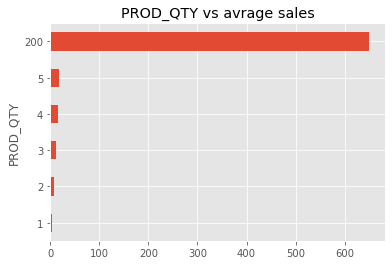

In [25]:
plt.style.use('ggplot')
data.groupby("PROD_QTY").mean()['TOT_SALES'].plot.barh()
plt.title("PROD_QTY vs avrage sales")


In [26]:
data[data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,2018-08
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,2019-05


we can see that there are only 6 different values in prod_qty colymn<br>
and almost all the records falls below 6, only 2 records holds value 200Both entries are by the same customer, we will examine this customer's other transactions.<br>
lets drop them as of now

In [27]:
data = data[data['PROD_QTY']<6]

###### Now let's unwrapp Prod name column and fatch out beautiful insights from it<br>
WE will try to know--<br>
* Different pack sizes available
* frequency for each pack size
* outliers
**for brands**<br>
* Different brands out there
* production(quantity) for each brand<br><br><br>
we can see that there's common trend in prod name,<br>Natural Chip        Compny SeaSalt175g'<br>     if we split it then we can get many usful infos such as brand name, prod type, pack size

In [28]:
## now let's check prod_name column and make sure that we have records for chips only
data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [29]:
data['PROD_NAME'] = data['PROD_NAME'].str.replace(r'[0-9]+(G)','g')
data['Pack_size'] = data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
data['Brand_Name'] = data['PROD_NAME'].str.split().str[0]

In [30]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Pack_size,Brand_Name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,175.0,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,160.0,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,175.0,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,170.0,Smiths


In [31]:
data['Pack_size'].describe()

count    258770.000000
mean        182.324276
std          64.955035
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: Pack_size, dtype: float64

Text(0.5, 1.0, 'Pack size distribution')

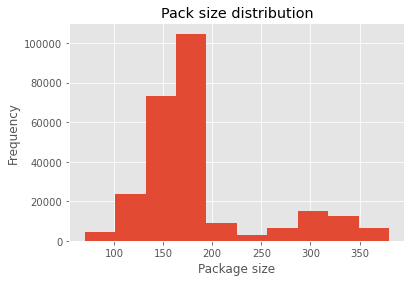

In [32]:
data['Pack_size'].plot.hist()
plt.xlabel("Package size")
plt.title('Pack size distribution')


Text(0.5, 1.0, 'Occurances of different pack sizes')

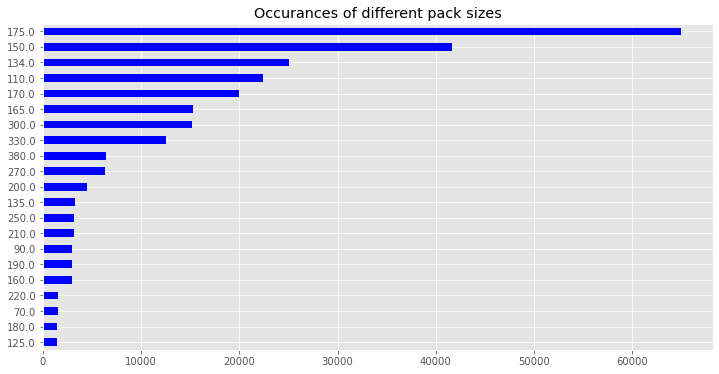

In [33]:
plt.figure(figsize=(12,6))
data['Pack_size'].value_counts(ascending=True).plot.barh(color='b')
plt.title("Occurances of different pack sizes")



Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.
<br>
Let's brand name as well 

In [34]:
data['Brand_Name'].value_counts(ascending=False)

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Brand_Name, dtype: int64

some products made by same brand had different style of brand name, let's explore it little bit further and wranggle 

<br> 
we can see that Derito and Doritos both are in our brands list , umm are they really two diffrent brands

In [35]:
def clean_brand_names(line):
    brand = line["Brand_Name"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [36]:
data["Brand_Name"] = data.apply(lambda line: clean_brand_names(line), axis=1)


In [37]:
data['Brand_Name'].value_counts(ascending=False)

Kettle             41288
Smiths             31823
Doritos            28145
Pringles           25102
RRD                17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old                 9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: Brand_Name, dtype: int64

Text(0, 0.5, 'Brand Name')

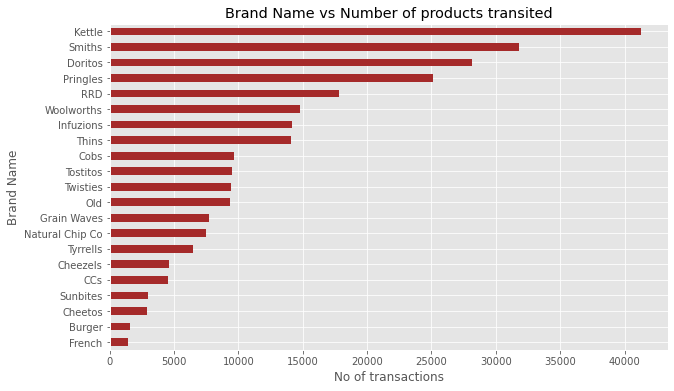

In [38]:
plt.figure(figsize=(10,6))
data['Brand_Name'].value_counts(ascending=True).plot.barh(color='brown')
plt.title("Brand Name vs Number of products transited")
plt.xlabel("No of transactions")
plt.ylabel("Brand Name")

Let's dive into `LIFSTAGE` and `PREMIUM_CONSUMER`. We will try to answer 
* How many different type of consumers are categoriesed ?
* No. of consumers in each catogery ?
* Which catogery spends most on chips(`TOT_SALES`) ?


We have total  7  categories for LIFESTAGE



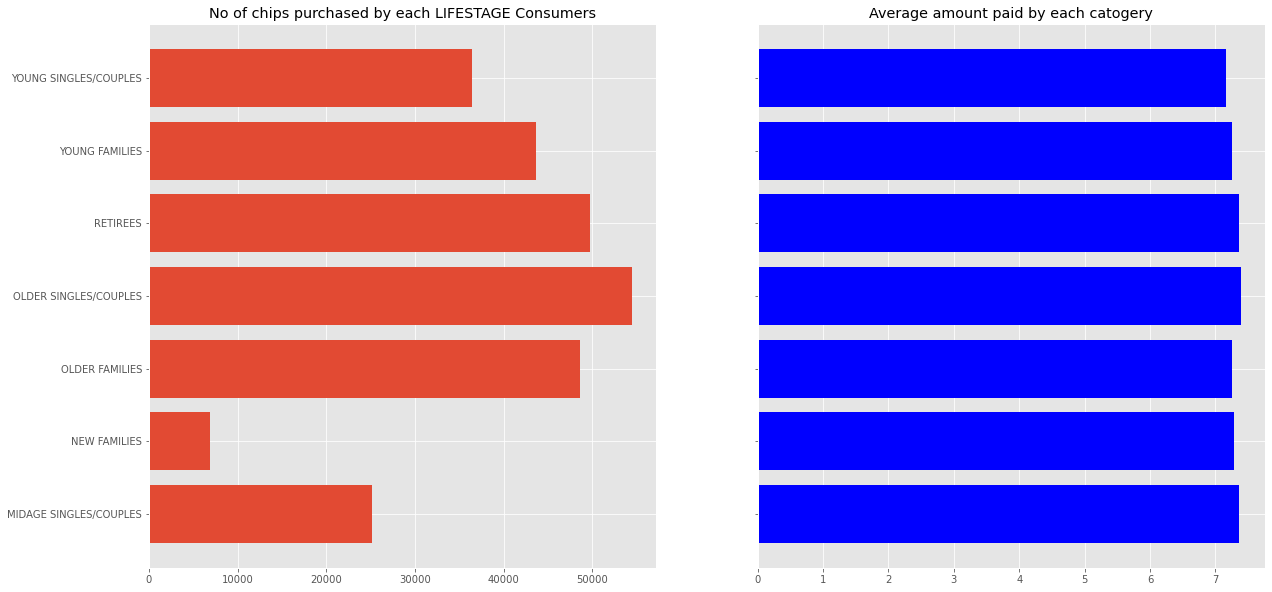

In [39]:
print("We have total ",len(data['LIFESTAGE'].unique())," categories for LIFESTAGE")
print()
grpLifestage = data.groupby("LIFESTAGE")["TOT_SALES"].agg(["count", "mean"])
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
fig.set_size_inches(20,10)
#plot count on ax1
ax1.barh(grpLifestage['count'].index,grpLifestage['count'].values);
ax1.set_title("No of chips purchased by each LIFESTAGE Consumers");

#plot average amount of sales on ax2
ax2.barh(grpLifestage['mean'].index,grpLifestage['mean'].values, color='b');
ax2.set_title("Average amount paid by each catogery");

so
* New families tend to purchase less number of chip packes.
* Older singles/couples buys most no of chip packs , umm seems weird , does they eat that? may be for their kids/grand kids. 
* Average amount paid by each catogery is almost same.

**PREMIMUM_CONSUMER** let's explore this too.

We have total  3  categories for LIFESTAGE



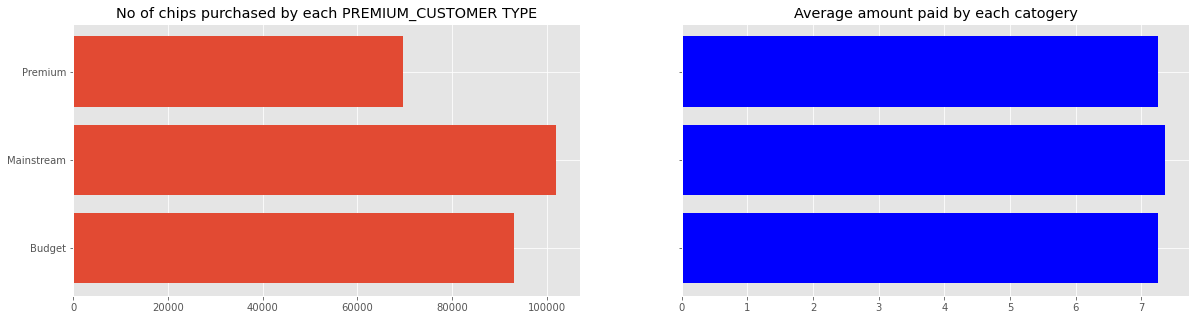

In [40]:
print("We have total ",len(data['PREMIUM_CUSTOMER'].unique())," categories for LIFESTAGE")
print()
grpPREMIUM_CUSTOMER = data.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].agg(["count", "mean"])
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
fig.set_size_inches(20,5)
#plot count on ax1
ax1.barh(grpPREMIUM_CUSTOMER['count'].index,grpPREMIUM_CUSTOMER['count'].values);
ax1.set_title("No of chips purchased by each PREMIUM_CUSTOMER TYPE");

#plot average amount of sales on ax2
ax2.barh(grpPREMIUM_CUSTOMER['mean'].index,grpPREMIUM_CUSTOMER['mean'].values, color='b');
ax2.set_title("Average amount paid by each catogery");

* premimum consumers tend to buy less no of chips.
* mainstream consumers are most frequent ones to by chips.
* they all pays almost equal for chips on average.

Now let's try to agrigate data for `LIFESTAGE` and `PRIMIUM_CONSUMER` and try to get insights from this.
we will try to and following questions...<br>
* Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
* How many customers are in each segment
* How many chips are bought per customer by segment
* What's the average chip price by customer segment

In [41]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


In [42]:
lp_sales = pd.DataFrame(data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean","count"]))
lp_sales.sort_values(ascending=False, by="sum")


sum      mean  count
LIFESTAGE              PREMIUM_CUSTOMER                            
OLDER FAMILIES         Budget            168363.25  7.269570  23160
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339  20854
RETIREES               Mainstream        155677.05  7.252262  21466
YOUNG FAMILIES         Budget            139345.85  7.287201  19122
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315  18407
                       Mainstream        133393.80  7.282116  18318
                       Premium           132263.15  7.449766  17754
RETIREES               Budget            113147.80  7.443445  15201
OLDER FAMILIES         Mainstream        103445.55  7.262395  14244
RETIREES               Premium            97646.05  7.456174  13096
YOUNG FAMILIES         Mainstream         92788.75  7.189025  12907
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284  11874
YOUNG FAMILIES         Premium            84025.50  7.266756  11563
OLDER FAMILIES         Premium            80658.40  7.208079  11190
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624   9242
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056   8216
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852   6281
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661   5020
NEW FAMILIES           Budget             21928.45  7.297321   3005
                       Mainstream         17013.90  7.317806   2325
                       Premium            11491.10  7.231655   1589

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

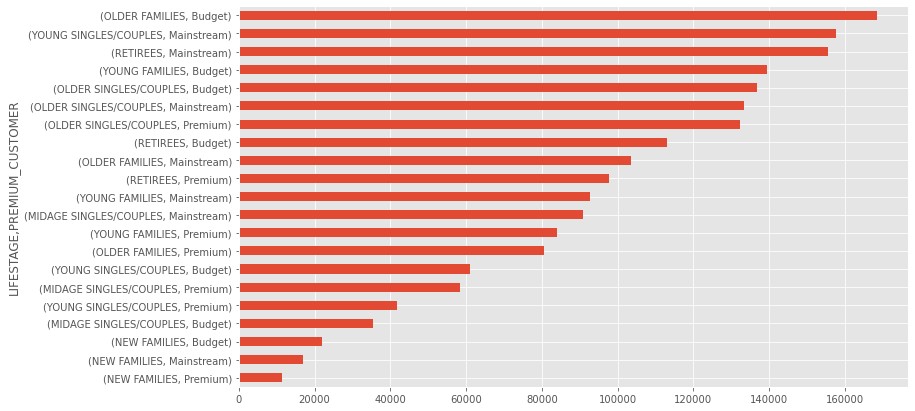

In [43]:
lp_sales['sum'].sort_values().plot.barh(figsize=(12,7))

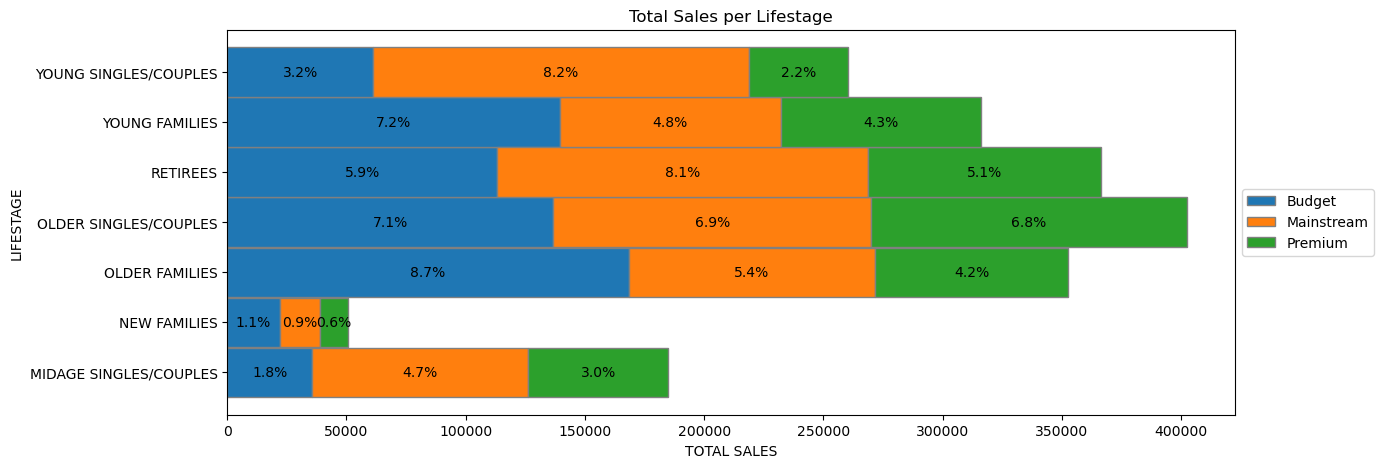

In [44]:
plt.style.use("default")
# getting the sum of total sales for each consumer graoup
bars1 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]

# percentages 
bars1_text = (bars1 / sum(lp_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(lp_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(lp_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = lp_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=.99, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=.99, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, bars3, left=bars2.values+ bars1.values, edgecolor='grey', height=.99, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=10)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=10)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=10)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

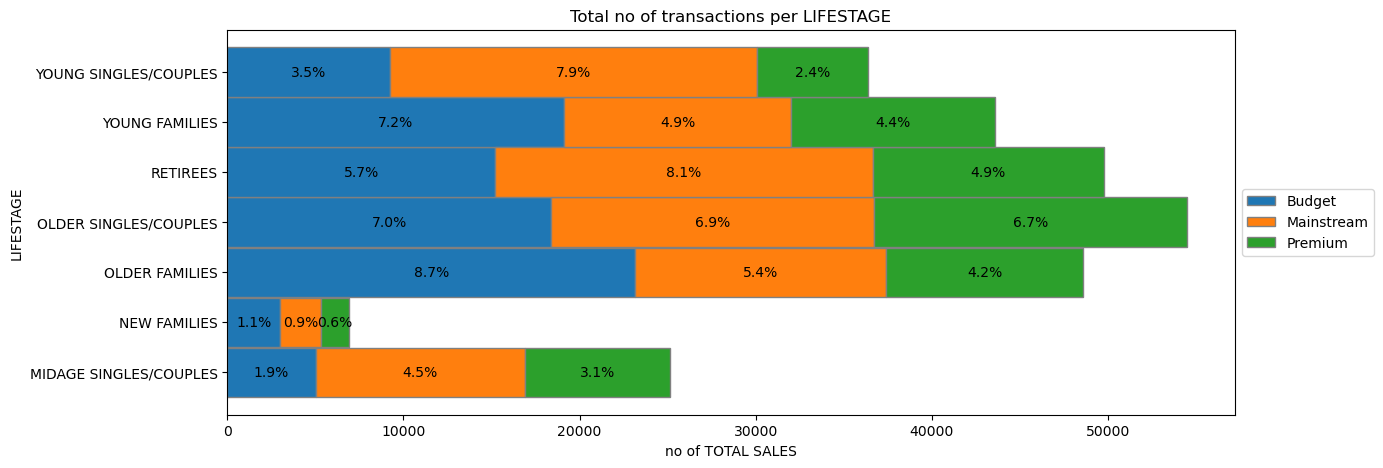

In [45]:
plt.style.use("default")
# getting the sum of total sales for each consumer graoup
bars1 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["count"]
bars2 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["count"]
bars3 = lp_sales[lp_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["count"]

# percentages 
bars1_text = (bars1 / sum(lp_sales["count"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(lp_sales["count"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(lp_sales["count"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = lp_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=.99, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=.99, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, bars3, left=bars2.values+ bars1.values, edgecolor='grey', height=.99, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=10)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=10)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=10)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("no of TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total no of transactions per LIFESTAGE")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

wouldn't it be more insightfull to see how many `unique` costumers are there in each sagement 

In [46]:
unique_costumers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
unique_costumers=pd.DataFrame(unique_costumers)
unique_costumers

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2273
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

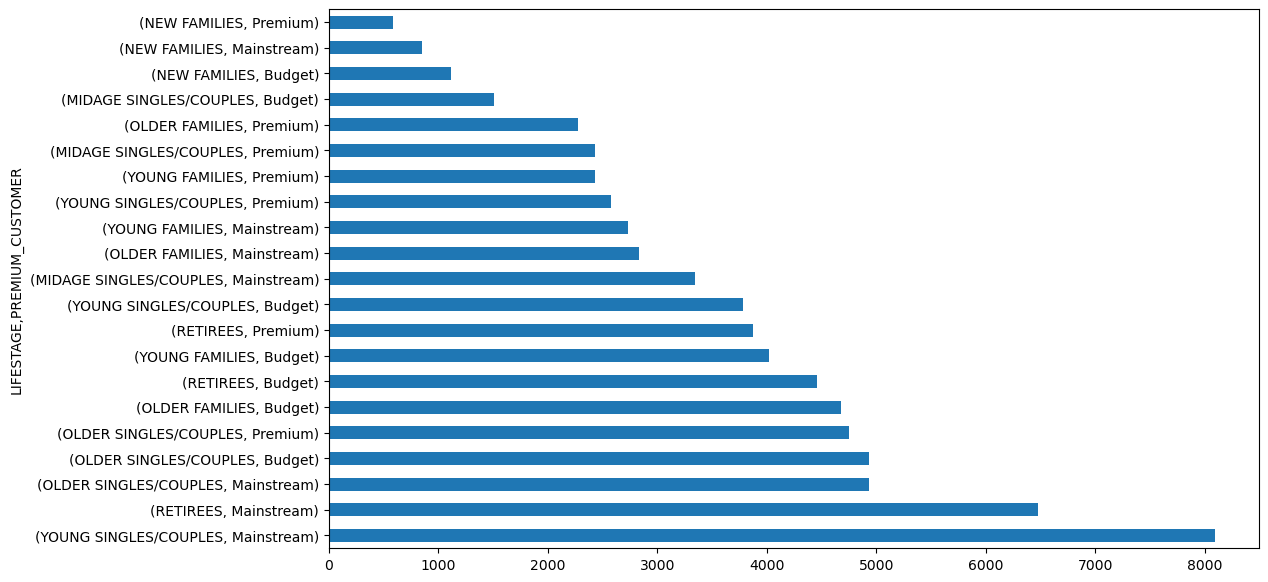

In [47]:
# let's plot the % of unique costumers for each sagement
unique_costumers['LYLTY_CARD_NBR'].plot.barh(figsize=(12,7))

In [48]:
#now let's see what impact product qty has for each sagemnt
unique_costumers['Prod_qty_per_costumer'] = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum()/unique_costumers['LYLTY_CARD_NBR'] 

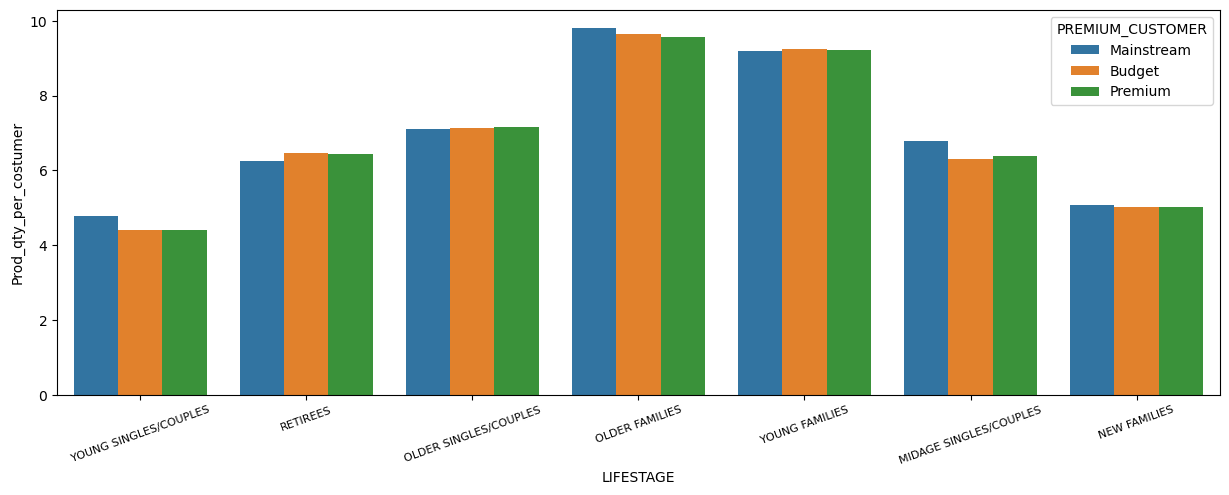

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x ="LIFESTAGE",y= "Prod_qty_per_costumer",hue="PREMIUM_CUSTOMER",data=unique_costumers.reset_index())
plt.xticks(fontsize=8,rotation=20);

In [50]:
data['Price_per_unit'] = data['TOT_SALES']/data["PROD_QTY"]


(3.5, 4.5)

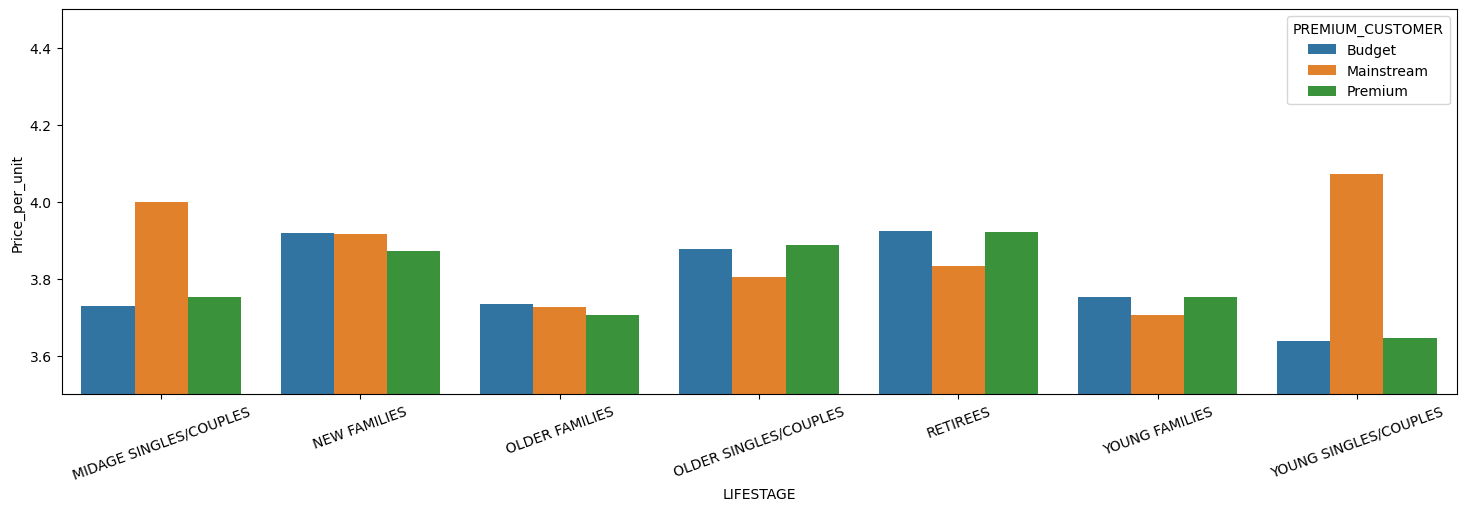

In [51]:
Price_per_unit =data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['Price_per_unit'].mean()
plt.figure(figsize=(18,5))
sns.barplot(x ="LIFESTAGE",y= "Price_per_unit",hue="PREMIUM_CUSTOMER",data=Price_per_unit.reset_index())
plt.xticks(fontsize=10,rotation=20);
plt.ylim(3.5,4.5)


In [52]:
#data.to_csv('data_after_task1.csv',index=False)

In [53]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Pack_size,Brand_Name,Price_per_unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,175.0,Natural Chip Co,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,175.0,CCs,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,160.0,Woolworths,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,175.0,CCs,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,170.0,Smiths,1.45


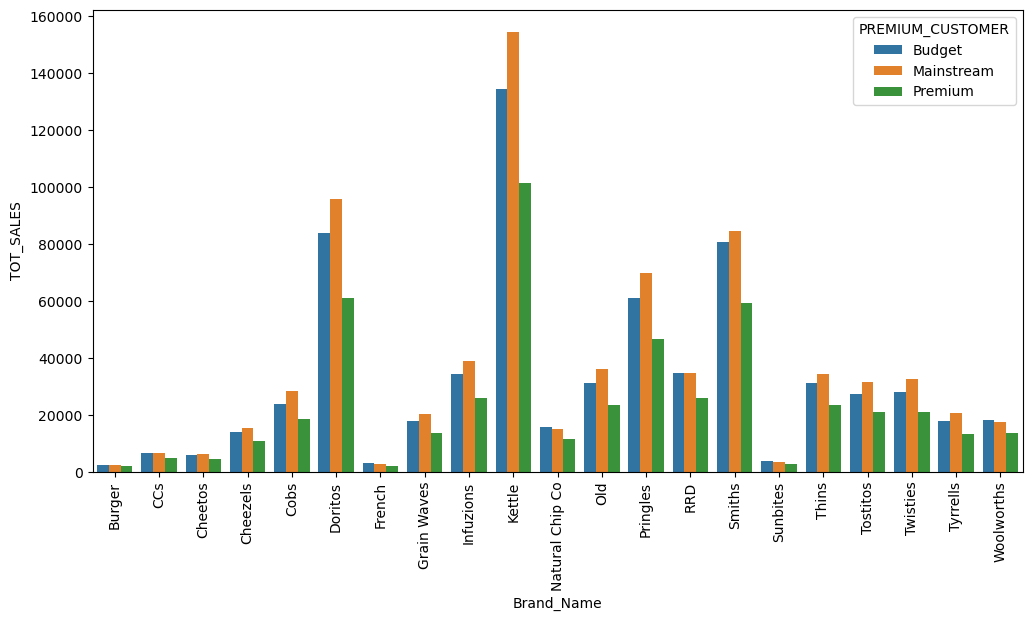

In [56]:
a =data.groupby(['Brand_Name','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x ="Brand_Name",y='TOT_SALES',hue="PREMIUM_CUSTOMER",data=a)
plt.xticks(rotation=90);

# Insights

1. Total sales revenue for a single day falls between the range of `5000-6000` throught the year , but notebale thing is that we dont have any sales record for **`25-dec-2018`** .


2. There's only one customer , who's card no. is `226000` who purchases 200 units of product no `4` twice in a year.


3. Meduim size chip packets `150-180` are most soled ones.


4. New families tend to purchase less number of chip packes.


5. premimum consumers tend to buy less no of chips and mainstream consumers are most frequent ones to by chips.


6. Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES).



7. We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments.




8. (Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts.
